No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/dq/_z5flvd13_503g4_dwyjnlg80000gn/T/ipykernel_7590/4212076650.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(new_tick_ylocations, fontsize=42)
/var/folders/dq/_z5flvd13_503g4_dwyjnlg80000gn/T/ipykernel_7590/4212076650.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(new_tick_xlocations, fontsize=42)


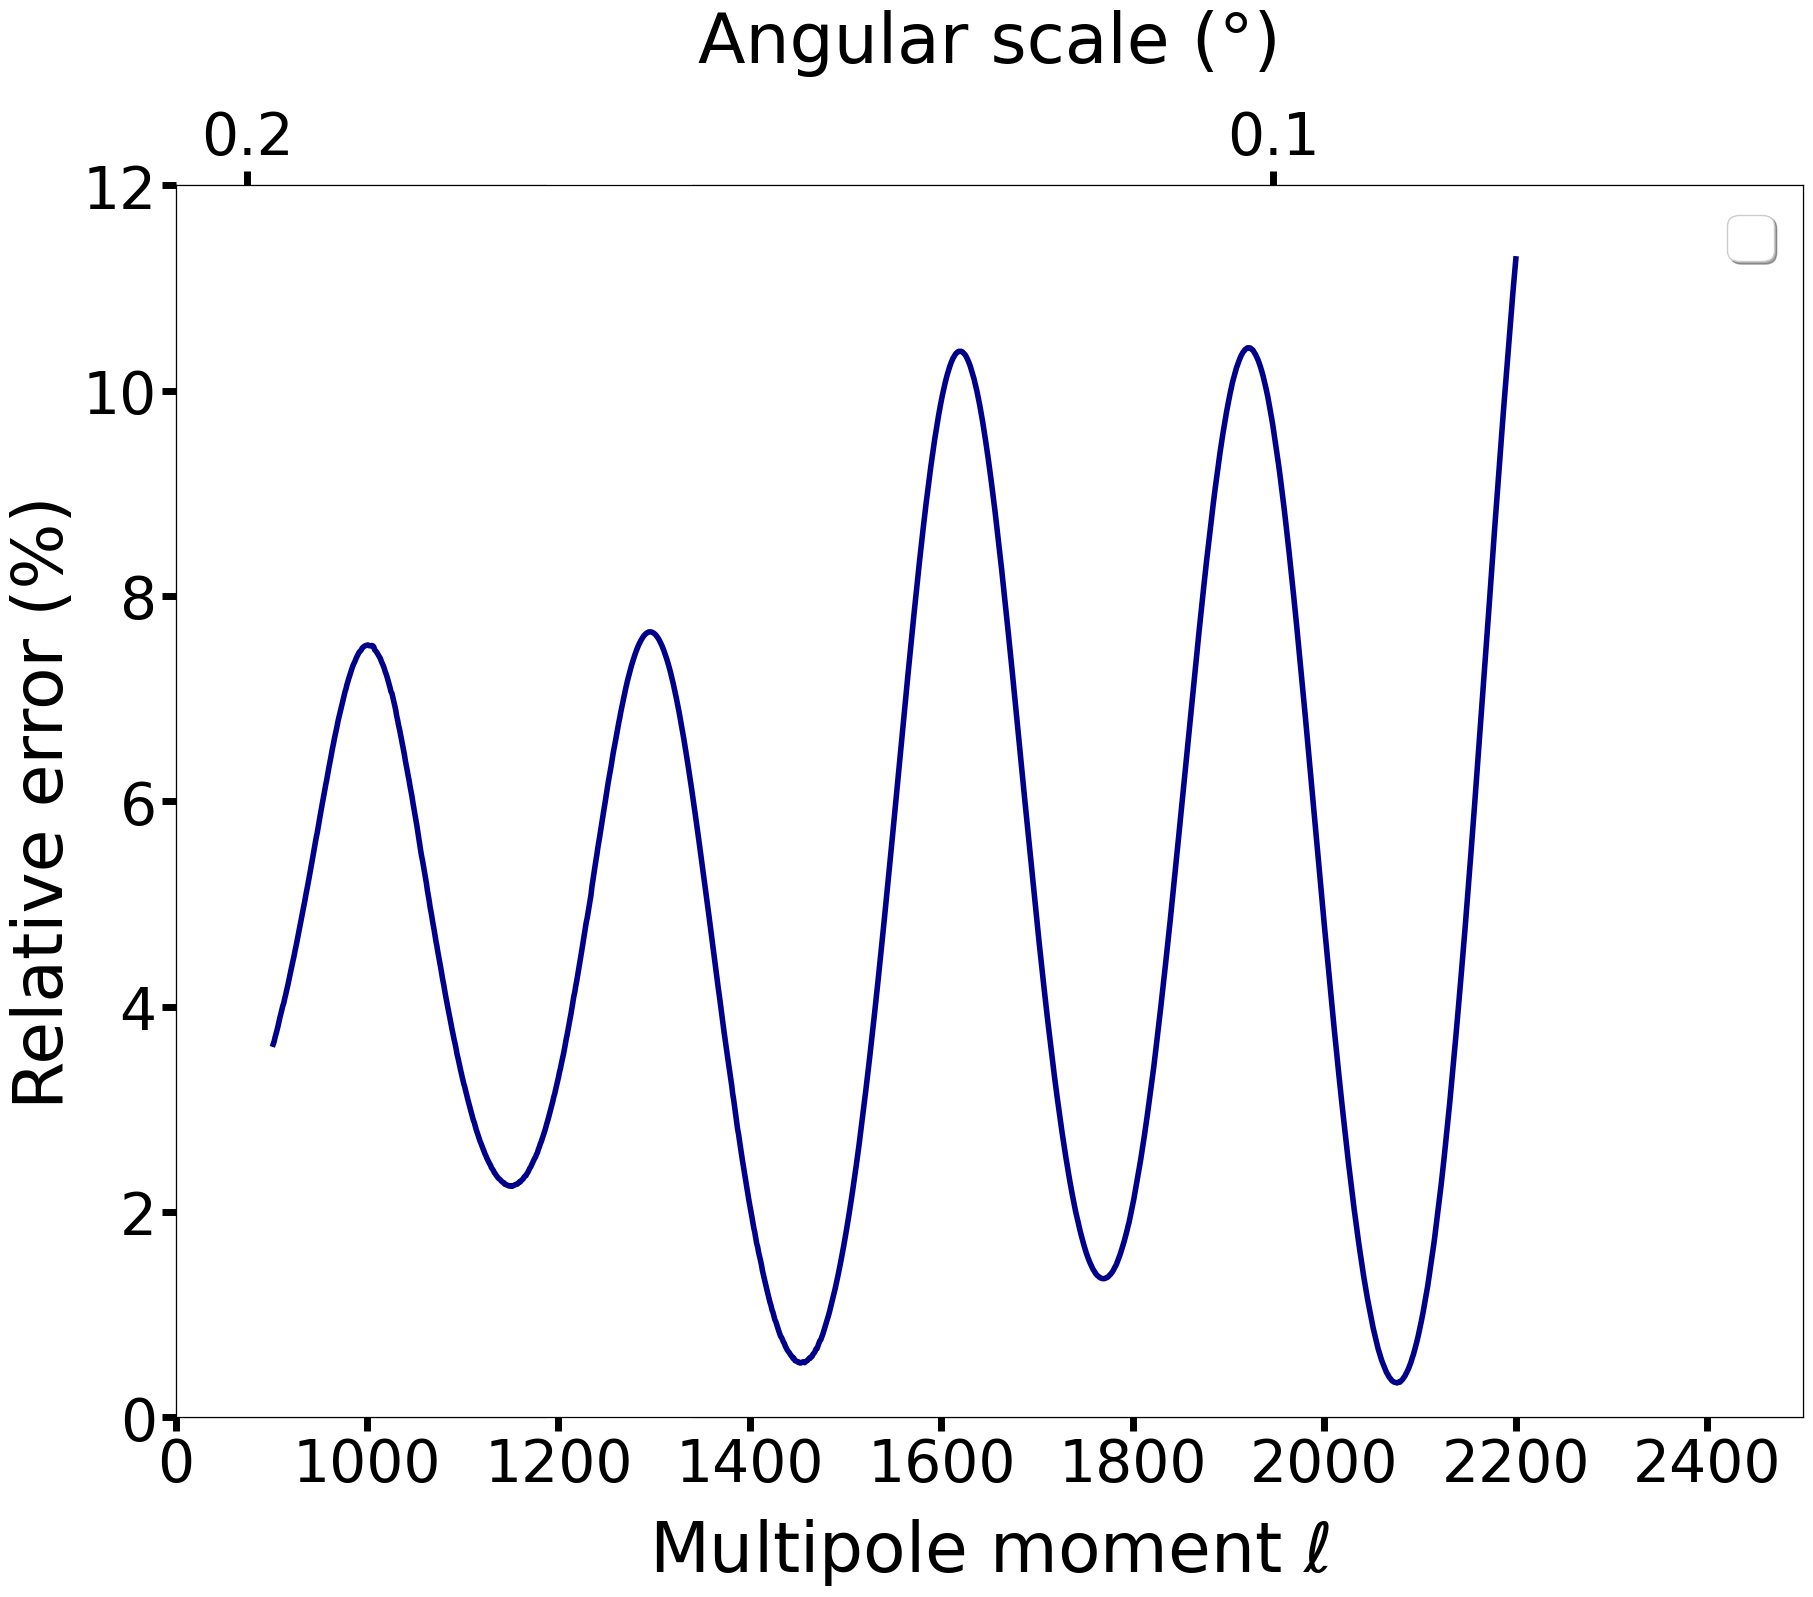

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def tick_function(l):
    theta = 180/l
    return theta

def read(name):
    x=[]
    y=[]
    f=open(name,'r')
    lines=f.readlines()
    first=lines.pop(0)
    for line in lines:
        cad=line.split()
        x.append(float(cad[0]))
        y.append(float(cad[1]))
    f.close()
    return x, y

def rel_e(l1,l2):
    l=[]
    for i in range (len(l1)):
        l.append(abs(1-l1[i]/l2[i])*100)
    return l

L, TT =read('test_scalCls.dat')
L_t, TT_t =read('COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(21, 16), gridspec_kw={'width_ratios': [1, 3]}, sharey=True)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.set_xlabel("Multipole moment $\ell$",fontsize=50)
ax1.xaxis.set_label_coords(0.5, -0.08)
ax1.set_ylabel("Relative error (%)",fontsize=50)
ax2.set_xlabel("Angular scale (°)",fontsize=50)
ax2.xaxis.set_label_coords(0.5, 1.1)
 

ax1.tick_params(width=5, length=10)
ax2.tick_params(width=5, length=10)



#l>900


ax1.set_ylim(0, 4000)

start_l = 900
finish_l = len(L_t) + 1
ticks = [900, 1800]
error=rel_e(TT, TT_t)
ax1.plot(L[start_l:finish_l], error[start_l:finish_l],color = 'darkblue',linewidth=4.0)

new_tick_locations = np.array(ticks)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations,fontsize=42)
ax2.set_xticklabels(tick_function(new_tick_locations),fontsize=42)


legend = ax1.legend(loc='upper right', shadow=True, fontsize=42)

new_tick_ylocations = np.array([0,2,4,6,8,10,12])
new_tick_xlocations = np.array([000,1000,1200,1400,1600,1800,2000,2200,2400,2600])
ax1.set_yticklabels(new_tick_ylocations, fontsize=42)
ax1.set_xticklabels(new_tick_xlocations, fontsize=42)
ax1.set_xlim(800, 2500)
ax1.set_ylim(0, 12)



#plt.show()
plt.savefig("error_Starobinsky_4.png")



